# 02. Neural Network Classification with Pytorch

## 1. Make classification data and get it ready

In [184]:
import sklearn
from sklearn.datasets import make_circles

In [185]:
n_samples = 1000
X, y = make_circles(n_samples, noise=0.03, random_state=42)

In [186]:
len(X), len(X)

(1000, 1000)

In [187]:
print(f'First 5 samples of X: \n {X[:5]}')
print(f'First 5 samples of y: \n {y[:5]}')
#binary classification and alread numerical 2 features of x to 1 label of y

First 5 samples of X: 
 [[ 0.75424625  0.23148074]
 [-0.75615888  0.15325888]
 [-0.81539193  0.17328203]
 [-0.39373073  0.69288277]
 [ 0.44220765 -0.89672343]]
First 5 samples of y: 
 [1 1 1 1 0]


## visualize data

In [188]:
df_X = X.T
df_X[0].shape

(1000,)

In [189]:
# make df of data
import pandas as pd

circles_df = pd.DataFrame({"feature1":df_X[0], "feature2":df_X[1], "target":y})
circles_df.head(10)


,feature1,feature2,target
0,0.754246,0.231481,1
1,-0.756159,0.153259,1
2,-0.815392,0.173282,1
3,-0.393731,0.692883,1
4,0.442208,-0.896723,0
5,-0.479646,0.676435,1
6,-0.013648,0.803349,1
7,0.771513,0.147760,1
8,-0.169322,-0.793456,1
9,-0.121486,1.021509,0


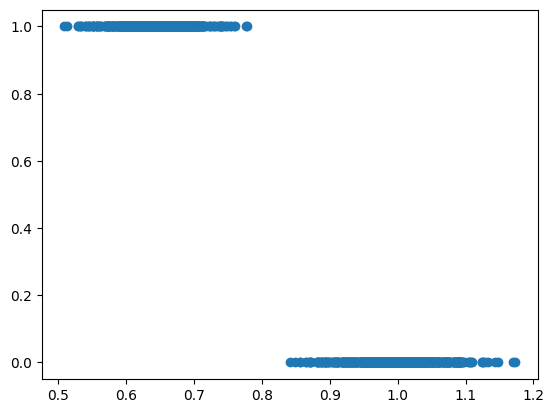

In [190]:
import matplotlib.pyplot as plt
plt.scatter((abs(circles_df['feature1']**2)+(circles_df["feature2"]**2)), circles_df['target'])

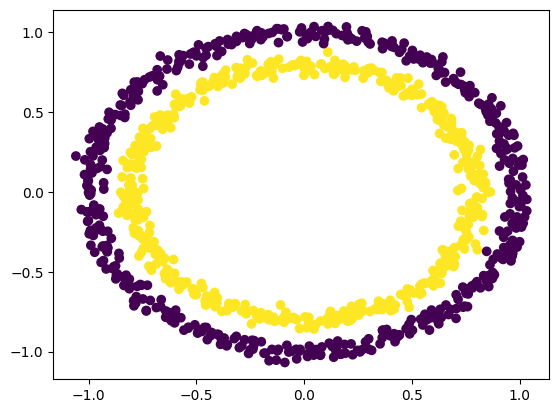

In [191]:
plt.scatter(circles_df['feature1'], circles_df['feature2'], c=y)
# blue dot vs red dot

the data we are working with is a toy dataset something we can expironment on

## 1.2 turn data into tensors and create train and test splits

In [192]:
import torch

X, y = torch.tensor(X, dtype=torch.float), torch.tensor(y, dtype=torch.float).unsqueeze(dim=1)

X, y

(tensor([[ 0.7542,  0.2315],
         [-0.7562,  0.1533],
         [-0.8154,  0.1733],
         ...,
         [-0.1369, -0.8100],
         [ 0.6704, -0.7675],
         [ 0.2811,  0.9638]]),
 tensor([[1.],
         [1.],
         [1.],
         [1.],
         [0.],
         [1.],
         [1.],
         [1.],
         [1.],
         [0.],
         [1.],
         [0.],
         [1.],
         [1.],
         [1.],
         [1.],
         [0.],
         [1.],
         [1.],
         [0.],
         [1.],
         [0.],
         [0.],
         [1.],
         [0.],
         [0.],
         [0.],
         [1.],
         [1.],
         [1.],
         [0.],
         [0.],
         [1.],
         [0.],
         [0.],
         [0.],
         [1.],
         [1.],
         [1.],
         [0.],
         [0.],
         [0.],
         [0.],
         [1.],
         [0.],
         [0.],
         [1.],
         [1.],
         [0.],
         [1.],
         [1.],
         [1.],
         [0.],
         [1.],


In [193]:
# train test split
split = int(len(X)*.8)

X_train, y_train = X[:split], y[:split]
X_test, y_test = X[split:], y[split:]
len(X_train), len(X_test)

(800, 200)

In [194]:
X.type()

'torch.FloatTensor'

## 2. Build the model

1. set device for agnostic code
2. contruct a model (subclass nn.model)
3. define loss/optim
4. create a training/test loop

In [195]:
import torch
from torch import nn
device = 'gpu' if torch.cuda.is_available() else "cpu"

In [196]:
# subclass

class logisticRegress(nn.Module):
    def __init__(self) -> None:
        super().__init__()
        
        self.layer1 = nn.Linear(in_features=2, out_features=8)
        self.layer2 = nn.Linear(in_features=8, out_features=1)
    
    def forward(self, X: torch.Tensor) -> torch.Tensor:
        out1 = self.layer1(X)
        return self.layer2(out1)
        

In [197]:
model_02 = logisticRegress().to(device)
model_02(X)

tensor([[-3.8180e-02],
        [ 5.7206e-01],
        [ 6.0159e-01],
        [ 5.5205e-01],
        [-1.8204e-01],
        [ 5.8385e-01],
        [ 4.2053e-01],
        [-6.5695e-02],
        [ 9.7789e-02],
        [ 5.1841e-01],
        [ 3.5543e-01],
        [ 1.8766e-01],
        [ 4.7070e-01],
        [-1.6684e-01],
        [-1.7302e-01],
        [-4.4703e-02],
        [ 5.2681e-01],
        [-1.7262e-02],
        [ 5.3633e-01],
        [ 3.0642e-01],
        [ 6.7954e-02],
        [ 6.6132e-01],
        [-1.3120e-02],
        [-2.0768e-02],
        [ 7.0954e-01],
        [ 6.5860e-01],
        [ 3.3826e-01],
        [-1.6159e-01],
        [-7.2870e-02],
        [-1.6714e-01],
        [ 1.3156e-01],
        [ 5.5419e-01],
        [ 4.0653e-01],
        [-1.9581e-01],
        [-2.0411e-03],
        [ 7.1517e-01],
        [ 5.9507e-01],
        [ 2.0663e-01],
        [-7.0518e-02],
        [ 6.5100e-02],
        [ 2.8073e-01],
        [ 2.9659e-01],
        [ 3.5253e-01],
        [-1

In [198]:
#We can replicate model above with sequential
"""
model_0 = nn.Sequential(
 nn.Linear(in_features=2, out_features=8),
 nn.Linear(in_features=8, out_features=1)    
).to(device)"""

'\nmodel_0 = nn.Sequential(\n nn.Linear(in_features=2, out_features=8),\n nn.Linear(in_features=8, out_features=1)    \n).to(device)'

In [199]:
model_02.state_dict()

OrderedDict([('layer1.weight',
              tensor([[-0.7023, -0.7034],
                      [ 0.6552, -0.5590],
                      [ 0.5811, -0.3949],
                      [ 0.3265, -0.5964],
                      [ 0.5895, -0.6218],
                      [-0.1820, -0.6423],
                      [ 0.1711, -0.4601],
                      [-0.3504, -0.5327]])),
             ('layer1.bias',
              tensor([ 0.2432,  0.3965, -0.1385, -0.0930, -0.3374, -0.0825,  0.5864,  0.2965])),
             ('layer2.weight',
              tensor([[ 0.3468, -0.2804, -0.1159, -0.2739,  0.0540, -0.0191,  0.0818, -0.3373]])),
             ('layer2.bias', tensor([0.2739]))])

In [200]:
untrained_pred = model_02(X_train.to(device))
len(untrained_pred)

800

In [201]:
# pick loss fuction

loss_fn = nn.BCEWithLogitsLoss()
optim = torch.optim.Adam(params=model_02.parameters(), lr= .01)

In [202]:
def measure_ac(y_pred, y_truth):
    #calc correct, sum to get num, item to extract number
    correct = torch.eq(y_pred, y_truth).sum().item()
    #devide
    return correct/len(y_pred)

In [212]:
# training loop!
epochs = 100 

epoch_num = []
loss_list  = []
test_loss_list =[]

train_ac = []
test_ac = []


for epoch in range(epochs):
    
    model_02.train()
    # forward pass
    y_pred_logits = model_02(X_train)
    y_pred = torch.round(torch.sigmoid(y_pred_logits))
    
    # calc loss
    loss = loss_fn(y_pred_logits, y_train)
    
    # zero grad
    optim.zero_grad()
    
    # back prop
    loss.backward()
    
    # optimize 
    optim.step()
    
    if epoch % 10 == 0: 
        model_02.eval()
        with torch.inference_mode():
            y_pred_log_test = model_02(X_test)
            y_pred_test = torch.round(torch.sigmoid(y_pred_log_test))

            test_loss = loss_fn(y_pred_log_test, y_test)
            print(f'Epoch {epoch} || Loss {loss} || Test Loss {test_loss}')
            epoch_num.append(epoch)
            loss_list.append(loss)
            test_loss_list.append(test_loss)
            train_ac.append(measure_ac(y_pred, y_train))
            test_ac.append(measure_ac(y_pred_test, y_test))

Epoch 0 || Loss 0.6924728155136108 || Test Loss 0.6994684338569641
torch.Size([200, 1])
Epoch 10 || Loss 0.6924729347229004 || Test Loss 0.6994875073432922
torch.Size([200, 1])
Epoch 20 || Loss 0.6924728155136108 || Test Loss 0.6993901133537292
torch.Size([200, 1])
Epoch 30 || Loss 0.6924728155136108 || Test Loss 0.6994010210037231
torch.Size([200, 1])
Epoch 40 || Loss 0.6924728155136108 || Test Loss 0.6994361877441406
torch.Size([200, 1])
Epoch 50 || Loss 0.6924728155136108 || Test Loss 0.6994198560714722
torch.Size([200, 1])
Epoch 60 || Loss 0.6924728155136108 || Test Loss 0.6994132995605469
torch.Size([200, 1])
Epoch 70 || Loss 0.6924727559089661 || Test Loss 0.6994219422340393
torch.Size([200, 1])
Epoch 80 || Loss 0.6924728155136108 || Test Loss 0.6994202136993408
torch.Size([200, 1])
Epoch 90 || Loss 0.6924728155136108 || Test Loss 0.6994181871414185
torch.Size([200, 1])


[tensor(0.6995), tensor(0.6995), tensor(0.6994), tensor(0.6994), tensor(0.6994), tensor(0.6994), tensor(0.6994), tensor(0.6994), tensor(0.6994), tensor(0.6994)]


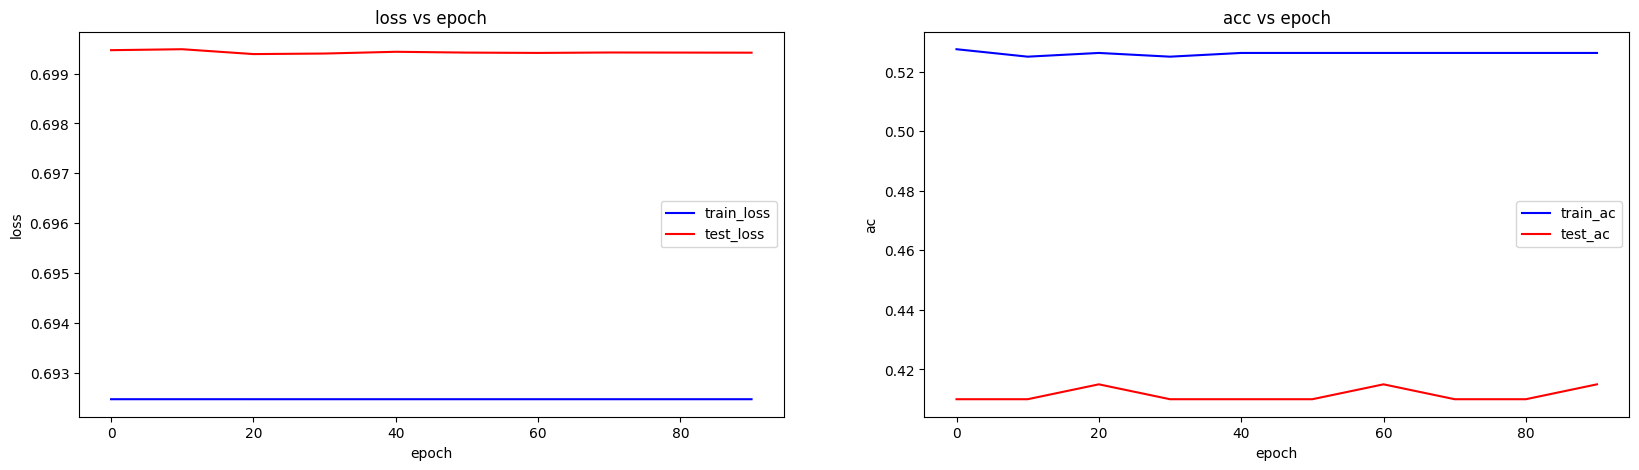

In [214]:
fig, ax = plt.subplots(1,2)
fig.set_figwidth(20)
fig.set_figheight(5)
print(test_loss_list)
with torch.inference_mode():
    ax[0].plot(epoch_num, loss_list, c='b', label="train_loss")
    ax[0].plot(epoch_num, test_loss_list, c='r', label="test_loss")
    ax[0].legend()
    ax[0].set_xlabel("epoch")
    ax[0].set_ylabel('loss')
    ax[0].set_title('loss vs epoch')
    
    ax[1].plot(epoch_num, train_ac, c='b', label='train_ac')
    ax[1].plot(epoch_num, test_ac, c='r', label='test_ac')
    ax[1].legend()
    ax[1].set_xlabel('epoch')
    ax[1].set_ylabel('ac')
    ax[1].set_title('acc vs epoch')


In [216]:
#Create data to see if it can fit a strait line

weight = .7
bias = .3

X = torch.arange(0, 1, 0.01)
y = X * .7 +.3

In [218]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2)
len(X_train)

80

## the missing piece non-linearity

In [240]:
import matplotlib.pyplot as plt
from sklearn.datasets import make_circles

X, y = make_circles(n_samples=1000, noise=.03, random_state=42)
X, y = torch.from_numpy(X).type(torch.float), torch.from_numpy(y).type(torch.float)

In [241]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2, random_state=42)

In [242]:
from torch import nn
class logisticRegress2(nn.Module):
    def __init__(self):
        super().__init__()
        
        self.layer1 = nn.Linear(in_features=2, out_features=16)
        self.layer1_act = nn.ReLU()
        self.layer2 = nn.Linear(in_features=16, out_features=1)
    
    def forward(self, x: torch.Tensor) -> torch.Tensor:
        out1 = self.layer1(x)
        lay1 = self.layer1_act(out1)
        return self.layer2(lay1)

In [243]:
model_03 = logisticRegress2()

In [244]:
loss_fn = torch.nn.BCEWithLogitsLoss()
optim = torch.optim.Adam(lr=.01, params=model_03.parameters())

In [245]:
epochs = 350

epoch_list=[]
lost_list=[]
test_loss_list=[]

train_ac = []
test_ac = []


for epoch in range(epochs):
    model_03.train()
    y_pred_log = model_03(X_train)
    y_pred = torch.round(torch.sigmoid(y_pred_log))
    loss = loss_fn(y_pred_log.squeeze(), y_train)
    optim.zero_grad()
    loss.backward()
    optim.step()
    if epoch % 10 == 0: 
        model_03.eval()
        with torch.inference_mode():
            y_pred_log_test = model_03(X_test)
            y_pred_test = torch.round(torch.sigmoid(y_pred_log_test))

            test_loss = loss_fn(y_pred_log_test.squeeze(), y_test)
            print(f'Epoch {epoch} || Loss {loss} || Test Loss {test_loss}')
            epoch_num.append(epoch)
            loss_list.append(loss)
            test_loss_list.append(test_loss)
            train_ac.append(measure_ac(y_pred, y_train))
            test_ac.append(measure_ac(y_pred_test, y_test))
    

Epoch 0 || Loss 0.6958531737327576 || Test Loss 0.6950914263725281
Epoch 10 || Loss 0.6836590766906738 || Test Loss 0.6829962730407715
Epoch 20 || Loss 0.6700254678726196 || Test Loss 0.6721188426017761
Epoch 30 || Loss 0.6529823541641235 || Test Loss 0.6580207347869873
Epoch 40 || Loss 0.6311144828796387 || Test Loss 0.6376532912254333
Epoch 50 || Loss 0.6046760082244873 || Test Loss 0.6146450042724609
Epoch 60 || Loss 0.5747520327568054 || Test Loss 0.588772177696228
Epoch 70 || Loss 0.5418866872787476 || Test Loss 0.5605511665344238
Epoch 80 || Loss 0.5068419575691223 || Test Loss 0.5282493829727173
Epoch 90 || Loss 0.47016793489456177 || Test Loss 0.4924178719520569
Epoch 100 || Loss 0.43234488368034363 || Test Loss 0.45420336723327637
Epoch 110 || Loss 0.39378783106803894 || Test Loss 0.41671890020370483
Epoch 120 || Loss 0.3559185862541199 || Test Loss 0.3831827640533447
Epoch 130 || Loss 0.3205324411392212 || Test Loss 0.3530609905719757
Epoch 140 || Loss 0.2876729667186737 || T

[tensor(0.6951), tensor(0.6830), tensor(0.6721), tensor(0.6580), tensor(0.6377), tensor(0.6146), tensor(0.5888), tensor(0.5606), tensor(0.5282), tensor(0.4924), tensor(0.4542), tensor(0.4167), tensor(0.3832), tensor(0.3531), tensor(0.3236), tensor(0.2950), tensor(0.2695), tensor(0.2458), tensor(0.2246), tensor(0.2057), tensor(0.1891), tensor(0.1750), tensor(0.1626), tensor(0.1512), tensor(0.1410), tensor(0.1320), tensor(0.1236), tensor(0.1162), tensor(0.1095), tensor(0.1032), tensor(0.0978), tensor(0.0927), tensor(0.0881), tensor(0.0839), tensor(0.0802)]


ValueError: x and y must have same first dimension, but have shapes (70,) and (35,)

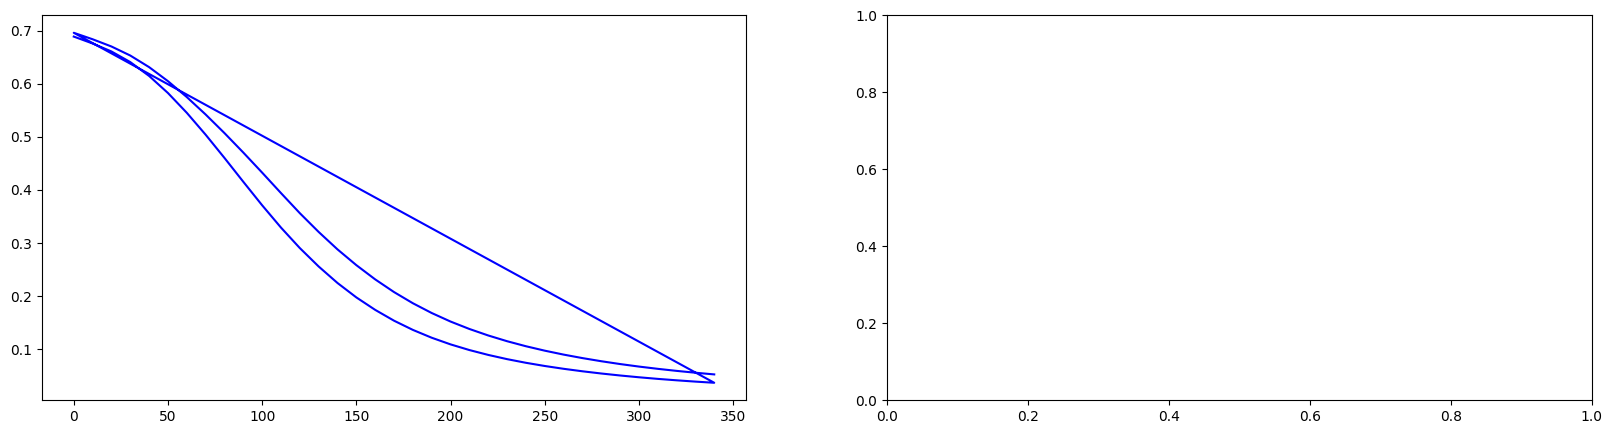

In [246]:
fig, ax = plt.subplots(1,2)
fig.set_figwidth(20)
fig.set_figheight(5)
print(test_loss_list)
with torch.inference_mode():
    ax[0].plot(epoch_list, loss_list, c='b', label="train_loss")
    ax[0].plot(epoch_list, test_loss_list, c='r', label="test_loss")
    ax[0].legend()
    ax[0].set_xlabel("epoch")
    ax[0].set_ylabel('loss')
    ax[0].set_title('loss vs epoch')
    
    ax[1].plot(epoch_list, train_ac, c='b', label='train_ac')
    ax[1].plot(epoch_list, test_ac, c='r', label='test_ac')
    ax[1].legend()
    ax[1].set_xlabel('epoch')
    ax[1].set_ylabel('ac')
    ax[1].set_title('acc vs epoch')